In [84]:
# Task 1 : Titanic Prediction Model



# Name : Hikma Yimer Mohammed
# Batch : A67 (August 2024)
# Internship : Data Science
# Aim : Build a Titanic Survival Prediction Model

In [85]:
# Import basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [86]:
# Load dataset

titanic_dataset = pd.read_csv("Titanic-Dataset.csv")
titanic_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [87]:
titanic_dataset.shape

(891, 12)

In [88]:
# Explore dataset

titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
# Look for null values
# Age, Embarked and Cabin have null values

titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Filling Missing Data

In [91]:
# Data Preprocessing

# drop cabin because it contains a lot of missing values
titanic_dataset.drop("Cabin", axis = 1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [92]:
# substitute missing values in Age using the mean age of the entire dataset
titanic_dataset.loc[:, "Age"] = titanic_dataset["Age"].fillna(titanic_dataset["Age"].mean())

In [94]:
# Dropping rows with NaN values in 'Embarked' column
titanic_dataset.dropna(subset=['Embarked'], inplace=True)

In [95]:
#now all the missing values (Except the Cabin because they are far too many) are filled or dropped
titanic_dataset.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [96]:
titanic_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [97]:
titanic_dataset.duplicated().sum()
#no duplicate entries

0

Data Visualization and Analysis

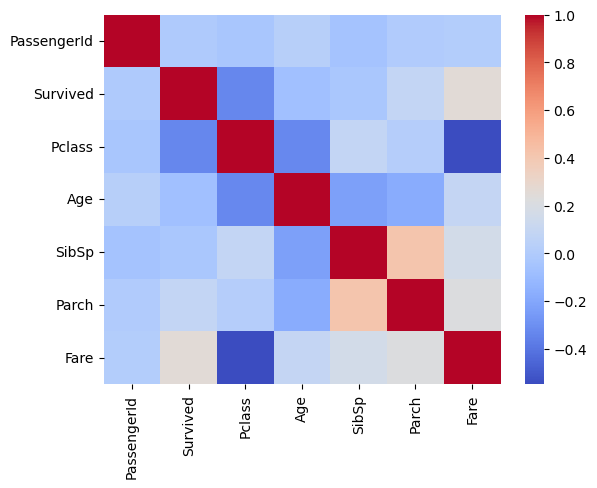

In [98]:
# Data Visualization & Correlation

import seaborn as sns

# change the data to only include numerical values
numeric_data = titanic_dataset.select_dtypes(include=['float64', 'int64'])

# to see the correlation of each varibale with eachother
sns.heatmap(numeric_data.corr(), cmap = "coolwarm")

plt.show()

In [99]:
titanic_dataset["Survived"].value_counts()

Survived
0    549
1    340
Name: count, dtype: int64

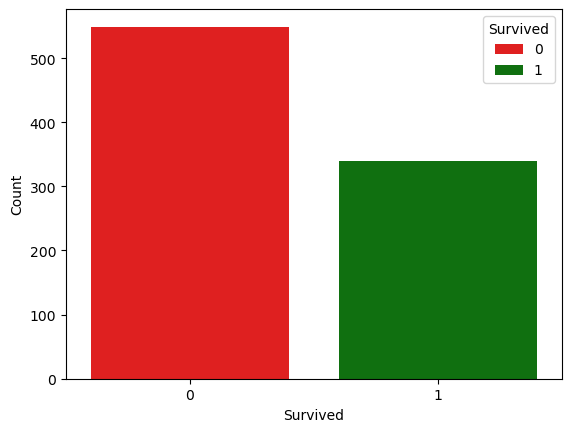

In [100]:
#to visualize how many survived and how many didn't

sns.countplot(x = "Survived", hue = "Survived", data = titanic_dataset, palette = ['red', 'green'])

plt.ylabel("Count")
plt.xlabel("Survived")
plt.show()



In [101]:
titanic_dataset[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.626168
1,2,0.472826
2,3,0.242363


<Axes: xlabel='Survived', ylabel='count'>

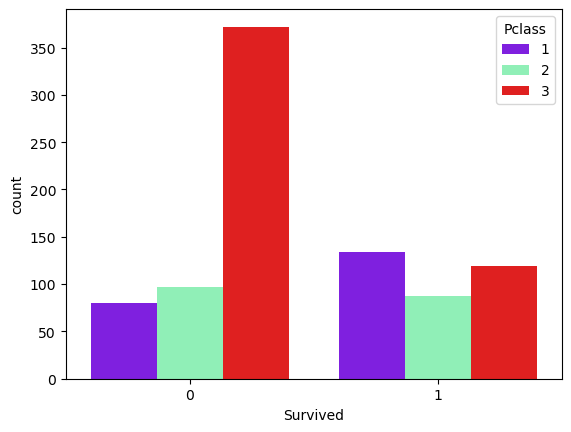

In [102]:

sns.countplot(x = "Survived",hue = "Pclass", data = titanic_dataset, palette = "rainbow")

#shows that the 1st class had a higher chance of survival as seen by the mean and graph

In [103]:
titanic_dataset["Sex"].value_counts()

Sex
male      577
female    312
Name: count, dtype: int64

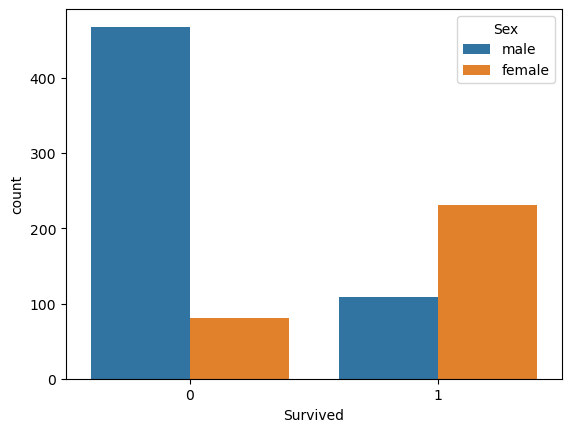

In [104]:
sns.countplot(x = "Survived", hue = "Sex", data = titanic_dataset)
plt.show()

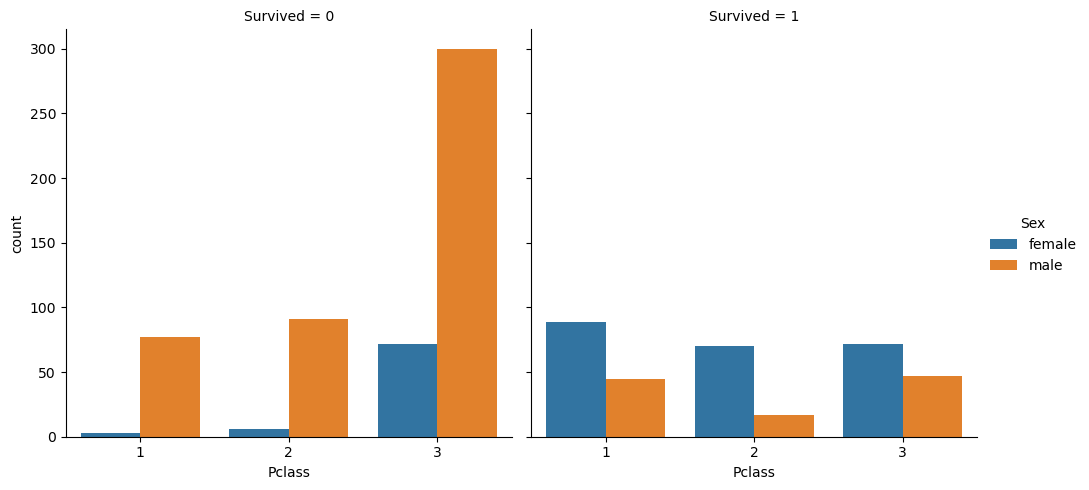

In [105]:
# correlating categorical variables : Pclass with Sex

sns.catplot(x="Pclass", col = "Survived",hue="Sex",data=titanic_dataset, kind = "count")


plt.show()


In [106]:
# through the mean and graph, we observe that location C has highest survival
print(titanic_dataset["Embarked"].unique())


['S' 'C' 'Q']


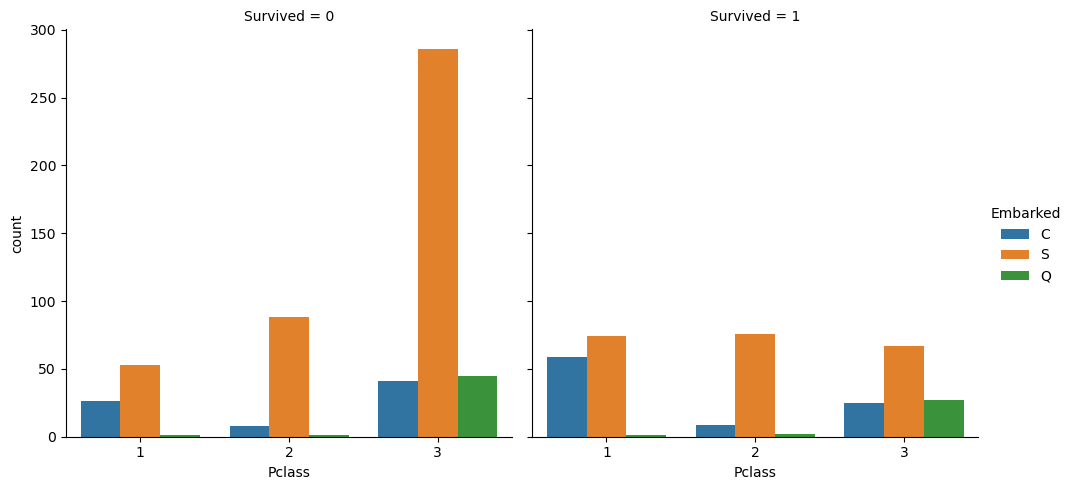

In [107]:
# correlating categorical variables : Pclass with Embarked 

sns.catplot(x="Pclass", col = "Survived",hue="Embarked",data=titanic_dataset, kind = "count")


plt.show()


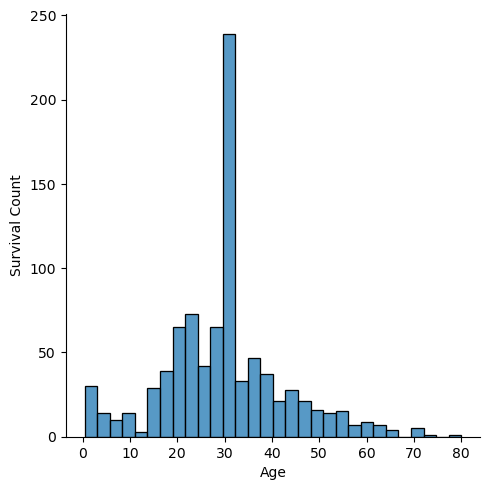

In [108]:
sns.displot(titanic_dataset['Age'].dropna())
plt.xlabel("Age")
plt.ylabel("Survival Count")

plt.show()

In [109]:
titanic_dataset["Parch"].value_counts()

Parch
0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch', ylabel='count'>

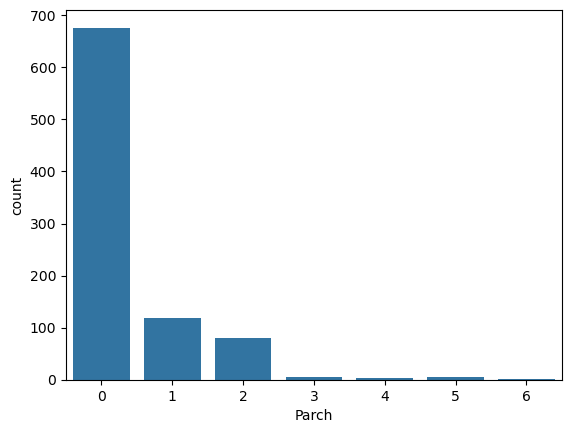

In [110]:
sns.countplot(x = "Parch",  data = titanic_dataset)

In [111]:
titanic_dataset["SibSp"].value_counts()

SibSp
0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp', ylabel='count'>

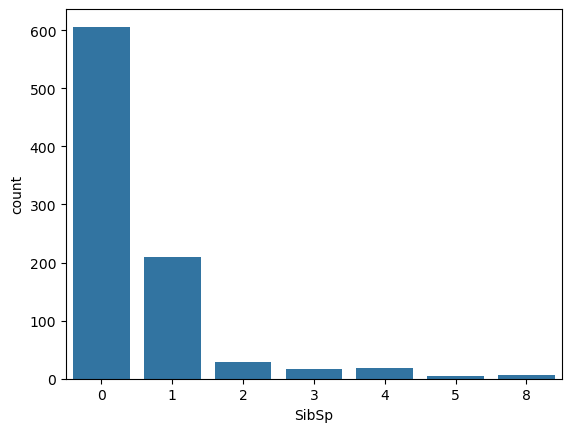

In [112]:
sns.countplot(x = "SibSp",data = titanic_dataset)

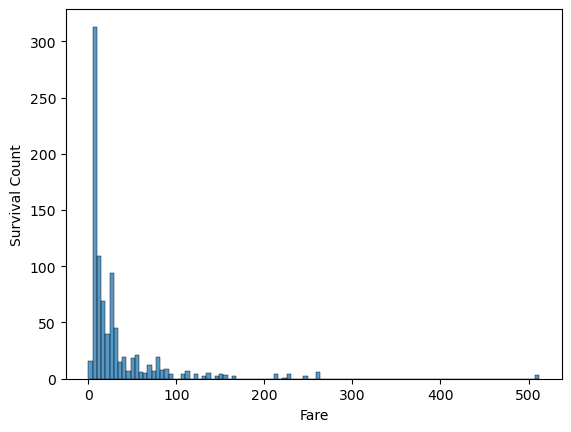

In [113]:
# Distribution plot for 'Fare'
sns.histplot(titanic_dataset['Fare'].dropna())  
plt.xlabel('Fare')
plt.ylabel('Survival Count')


plt.show()


In [114]:

# before we start training  the data, what should we should drop columns that are not significant in predicting survival
X = titanic_dataset.drop(columns = ["Name", "Ticket", "PassengerId", "Cabin", "Survived"], axis=1)
Y = titanic_dataset["Survived"]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [115]:
# change the non-numerical varibales (Sex, Embarked) to numerical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for i in ["Sex", "Embarked"]:
    X[i] = labelencoder.fit_transform(X[i])
    


X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Sex       889 non-null    int32  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   Embarked  889 non-null    int32  
dtypes: float64(2), int32(2), int64(3)
memory usage: 48.6 KB


Modelling / Training Dataset


In [116]:
from sklearn.model_selection import train_test_split

# Train Model

x_train, x_test, y_train, y_test = train_test_split(X, Y , test_size = 0.2, random_state= 42)
print("Training set size: ", x_train.shape)
print("Testing set size: ", x_test.shape)


Training set size:  (711, 7)
Testing set size:  (178, 7)


In [117]:
X, Y

(     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
 0         3    1  22.000000      1      0   7.2500         2
 1         1    0  38.000000      1      0  71.2833         0
 2         3    0  26.000000      0      0   7.9250         2
 3         1    0  35.000000      1      0  53.1000         2
 4         3    1  35.000000      0      0   8.0500         2
 ..      ...  ...        ...    ...    ...      ...       ...
 886       2    1  27.000000      0      0  13.0000         2
 887       1    0  19.000000      0      0  30.0000         2
 888       3    0  29.699118      1      2  23.4500         2
 889       1    1  26.000000      0      0  30.0000         0
 890       3    1  32.000000      0      0   7.7500         1
 
 [889 rows x 7 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 889, dtype: int64)

In [118]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

Create Prediction Model

In [119]:
# Make Predictions

y_test_pred = model.predict(x_test)
print(y_test_pred)


[0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1]


In [120]:
print(y_test)

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64


In [121]:
y_train_pred = model.predict(x_train)
print(y_train_pred)

[1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0
 1 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 1 0
 0 1 0 0 0 1 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1
 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0
 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0
 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 1 

In [122]:
print(y_train)

708    1
240    0
382    0
792    0
683    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 711, dtype: int64


In [123]:
# Evaluate the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(y_train, y_train_pred))
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       440
           1       0.75      0.70      0.73       271

    accuracy                           0.80       711
   macro avg       0.79      0.78      0.79       711
weighted avg       0.80      0.80      0.80       711

              precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.79      0.78      0.78       178



In [124]:
# Test with sample data 

sample_df = pd.DataFrame({"Pclass":[1], "Sex":[1], "Age":[80.0], "SibSp":[0],"Parch":[1],"Fare":[8],"Embarked":[3]})

In [125]:
pred = model.predict(sample_df)
 

if pred[0] == 0:
    print("Did not survive")
else:
    print("Survived")


Did not survive


In [126]:
# Save Model

import joblib
joblib.dump(model, "titanic_model.pk1")

['titanic_model.pk1']